#### Title: Milestone 3
#### Author: Jerock Kalala
#### Date: May 22th 2023
#### Modified By: --
#### Neural Networks


In [29]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [4]:
data = pd.read_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Week_6\\startups_profit2.csv", thousands=' ')
print(data.shape)
data.head()

(50, 5)


,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA and feature engineering

In [5]:
print(data.columns, "\n")
data.info()

Index(['RDSpend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# check for missing values
print(data.isnull().sum())

RDSpend           0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64


In [7]:
# drop missing values
data = data.dropna()

In [8]:
# explore dataset
data.describe()

,RDSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot: xlabel='RDSpend', ylabel='Profit'>

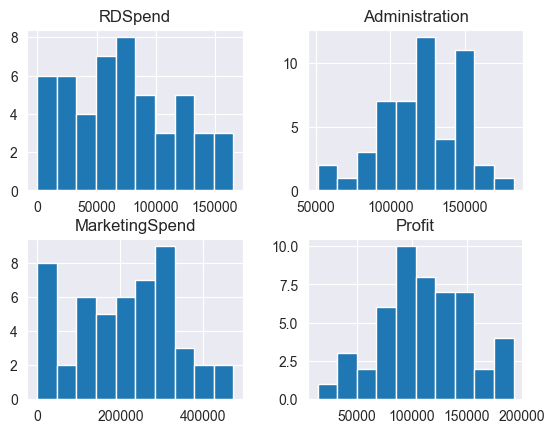

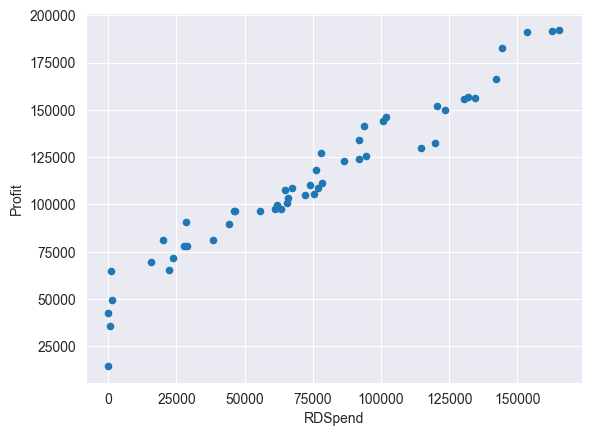

In [9]:
# visualize data
data.hist()
data.plot.scatter(x='RDSpend', y='Profit')

In [10]:
data.corr()

C:\Users\jeroc\AppData\Local\Temp\ipykernel_12248\1185648202.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


C:\Users\jeroc\AppData\Local\Temp\ipykernel_12248\1614732859.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1)


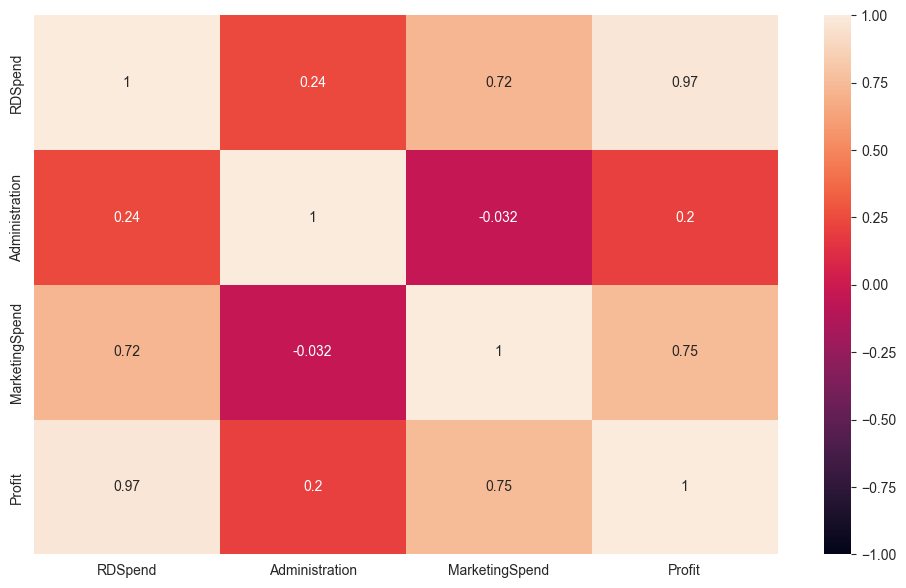

In [11]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [12]:
# encode categorical variables
data = pd.get_dummies(data, columns=['State'])

In [13]:
data.columns

Index(['RDSpend', 'Administration', 'MarketingSpend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RDSpend           50 non-null     float64
 1   Administration    50 non-null     float64
 2   MarketingSpend    50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_New York    50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [15]:
# scale numerical variables
scaler = StandardScaler()
data[['RDSpend', 'Administration', 'MarketingSpend']] = scaler.fit_transform(data[['RDSpend', 'Administration', 'MarketingSpend']])

In [16]:
# create new features
data['Profit/RDSpend'] = data['Profit'] / data['RDSpend']
data['Marketing/R&DSpend'] = data['MarketingSpend'] / data['RDSpend']

In [17]:
print(data.columns, "\n")
data.head()

Index(['RDSpend', 'Administration', 'MarketingSpend', 'Profit',
       'State_California', 'State_Florida', 'State_New York', 'Profit/RDSpend',
       'Marketing/R&DSpend'],
      dtype='object') 



,RDSpend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_New York,Profit/RDSpend,Marketing/R&DSpend
0,2.016411,0.560753,2.153943,192261.83,0,0,1,95348.509296,1.068206
1,1.955860,1.082807,1.923600,191792.06,1,0,0,98060.202166,0.983506
2,1.754364,-0.728257,1.626528,191050.39,0,1,0,108900.102108,0.927133
3,1.554784,-0.096365,1.422210,182901.99,0,0,1,117638.222675,0.914732
4,1.504937,-1.079919,1.281528,166187.94,0,1,0,110428.488041,0.851549


In [18]:
data.dtypes

RDSpend               float64
Administration        float64
MarketingSpend        float64
Profit                float64
State_California        uint8
State_Florida           uint8
State_New York          uint8
Profit/RDSpend        float64
Marketing/R&DSpend    float64
dtype: object

In [22]:
# Separating the categorical variable (State) and numerical features
categorical_features = ['State_California', 'State_Florida', 'State_New York']  # Update with the actual categorical feature column name(s)
numerical_features = data.drop(['Profit'] + categorical_features, axis=1)
num = ['R&D Spend', 'Administration', 'Marketing Spend', 'Marketing/R&D Spend', 'Profit/RDSpend']


In [23]:
# split data into training and testing sets
X = data.drop('Profit', axis=1)
y = data['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print("x_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

x_train shape:  (40, 8)
Y_train shape:  (40,)
x_test shape:  (10, 8)
Y_test shape:  (10,)


In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)])

#### Training the MLP

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
2/2 [==============================] - 5s 10ms/step - loss: 47480827904.0000
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 19422121984.0000
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 13426842624.0000
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 14330622976.0000
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14350092288.0000
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 13836317696.0000
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 13466368000.0000
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 13543857152.0000
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 14080930816.0000
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 13906537472.0000
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 13833131008.0000
Epoch 12/100
2/2 [===========

#### Mean Square Error

In [27]:
# Determination of Root Mean Square Error
loss = model.evaluate(X_test, y_test)
print(f'Root Mean Squared Error (RMSE): {np.sqrt(loss)}')

1/1 [==============================] - 0s 196ms/step - loss: 8015293440.0000
Root Mean Squared Error (RMSE): 89528.17120884353


In [32]:
# Predicting on the test set
y_pred = model.predict(X_test)
y_pred[:5]

1/1 [==============================] - 0s 34ms/step


array([[ 2848.5027],
       [ 6376.6045],
       [23585.068 ],
       [ 2472.4731],
       [ 2320.8193]], dtype=float32)

#### R-squared score

In [30]:
# Calculating the R-squared score

r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

R-squared score: -8.897964649681683


#### Model Summary


In [31]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________


#### Visualization

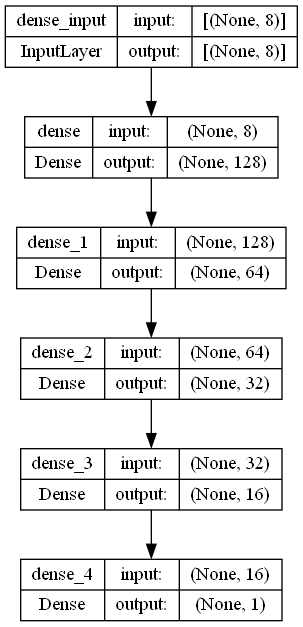

In [34]:
# Required library for visualisation of the neural networks
from tensorflow.keras.utils import plot_model

# visualization to a file
plot_model(model, to_file='neural_network.png', show_shapes=True, show_layer_names=True)